In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [236]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# import seaborn as sns
# import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv('HepatitisCdata.csv', index_col=0)
print(len(df))
df

615


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [193]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [194]:
df = df.dropna().copy()

In [195]:
len(df)

589

In [196]:
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [197]:
df.Category.value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

<AxesSubplot:>

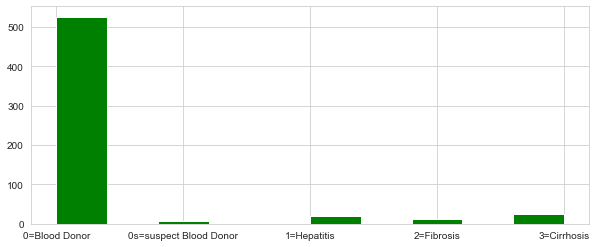

In [198]:
df.Category.hist(figsize=(10,4))

<AxesSubplot:>

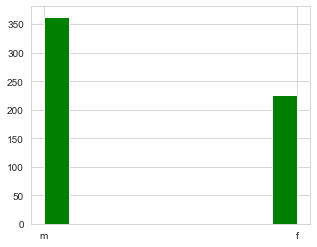

In [199]:
df.Sex.hist(figsize=(5,4))

In [200]:
df['Sex_male'] = df.Sex=='m'

In [201]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


In [249]:
def imp_kdeplot(feature):     
    fig = plt.figure(figsize = (7,3))
    sns.kdeplot(feature, data=df[~((df.Category=='0=Blood Donor')|(df.Category=='0s=suspect Blood Donor'))],fill=True, color='red', label='Healthy')
    sns.kdeplot(feature, data=df[df.Category=='1=Hepatitis'],fill=True, color='green', label='Hepatitis')
    sns.kdeplot(feature, data=df[df.Category=='2=Fibrosis'],fill=True, color='blue', label='Fibrosis')
    sns.kdeplot(feature, data=df[df.Category=='3=Cirrhosis'],fill=True, color='yellow', label='Cirrhosis')
    fig.legend()

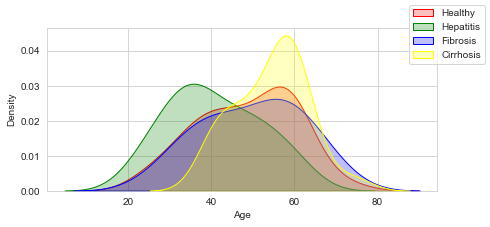

In [250]:
imp_kdeplot('Age')

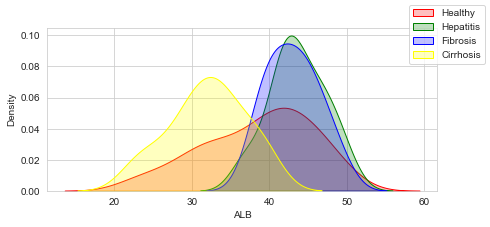

In [252]:
imp_kdeplot('ALB')

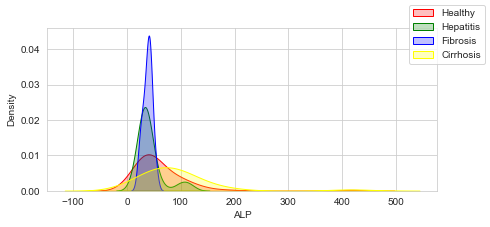

In [253]:
imp_kdeplot('ALP')

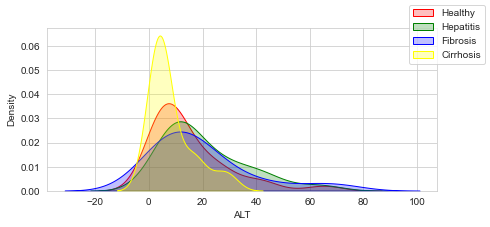

In [254]:
imp_kdeplot('ALT')

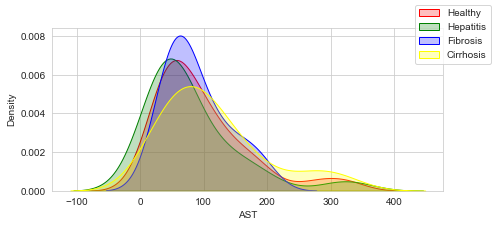

In [255]:
imp_kdeplot('AST')

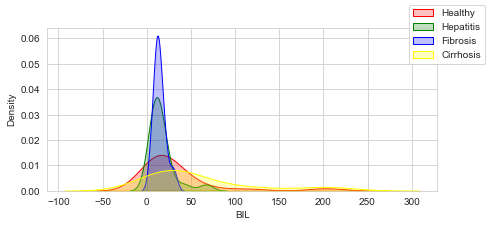

In [256]:
imp_kdeplot('BIL')

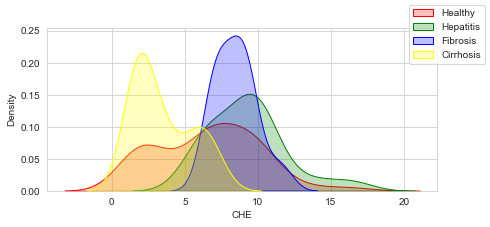

In [257]:
imp_kdeplot('CHE')

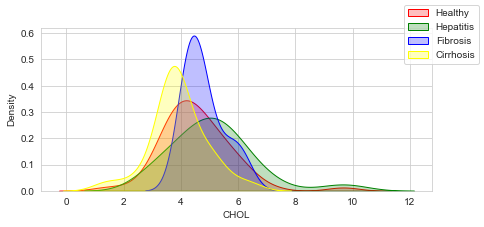

In [258]:
imp_kdeplot('CHOL')

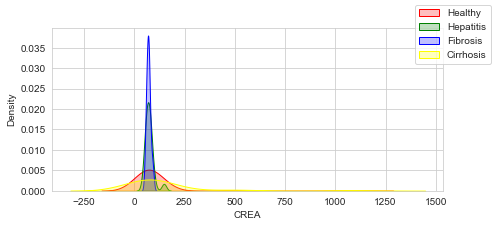

In [259]:
imp_kdeplot('CREA')

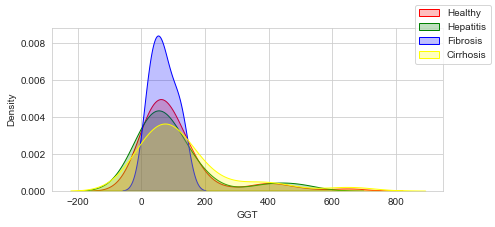

In [260]:
imp_kdeplot('GGT')

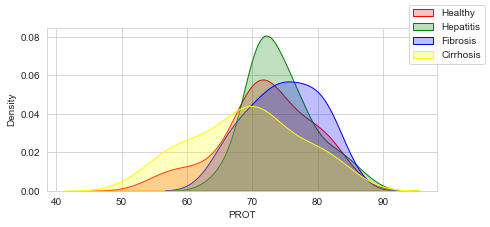

In [261]:
imp_kdeplot('PROT')

In [16]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT', 'Sex_male'],
      dtype='object')

In [268]:
feature = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Sex_male']

In [269]:
X = df[feature]
y = df.Category

In [270]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [271]:
y = y.apply(lambda x: 1.0 if x=='1=Hepatitis' else 2.0 if x=='2=Fibrosis' else 3.0 if x=='3=Cirrhosis' else 0.0)


In [272]:
sm = SMOTE(random_state=14)
X_smote, y_smote = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.2)

In [273]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8477751756440282

In [274]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       107
         1.0       0.61      0.81      0.69        85
         2.0       0.85      0.71      0.77       131
         3.0       1.00      0.97      0.99       104

    accuracy                           0.85       427
   macro avg       0.86      0.85      0.85       427
weighted avg       0.87      0.85      0.85       427

